In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt
from os import listdir

In [2]:
def read_files(path = "D:\ML\ML_HW1\Data\image/Images/"):
    blue = [path + f for f in listdir(path) if f[0] == "c"]
    red = [path + f for f in listdir(path) if f[0] == "m"]
    return red , blue

#calculate the averege of one image
def average_image_color(img , remove_green = False):
    avg_color_per_row = numpy.average(img, axis=0)
    avg_color = numpy.average(avg_color_per_row, axis=0)
    if remove_green:
        return (avg_color[0],avg_color[2])
    return tuple(avg_color)

#return a list that contain average of images
def get_averages(images:list, return_type = "list" , remove_green = False ):
    averages_list = []
    if return_type == "list":
        for i in images:
            image = cv2.imread(i)
            averages_list.append(average_image_color(image , remove_green))
    return averages_list

In [3]:
blue , red = read_files()
chel_averages = get_averages(blue , remove_green = True)
man_averages = get_averages(red , remove_green = True)

In [4]:
x1,y1 = [],[]
for i in range(len(chel_averages)):
    x1.append(man_averages[i][0])
    y1.append(man_averages[i][1])
x2,y2 = [],[]
for i in range(len(chel_averages)):
    x2.append(chel_averages[i][0])
    y2.append(chel_averages[i][1])  

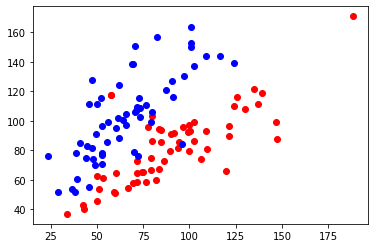

In [5]:
plt.scatter(x1,y1, c='red')
plt.scatter(x2,y2, c='blue')

In [6]:
red_to_blue_ratio_c = [i[0]/i[1] for i in chel_averages]
red_to_blue_ratio_m = [i[0]/i[1] for i in man_averages]
red_to_blue_ratio_all = red_to_blue_ratio_c + red_to_blue_ratio_m

In [7]:
#0.8924657649531078
average_red_blue_ratio = sum(red_to_blue_ratio_all)/len(red_to_blue_ratio_all)

true_chelsea =  [i for i in red_to_blue_ratio_c if i < average_red_blue_ratio]
false_man =  [i for i in red_to_blue_ratio_c if i > average_red_blue_ratio]

true_man =  [i for i in red_to_blue_ratio_m if i > average_red_blue_ratio]
false_chelsea =  [i for i in red_to_blue_ratio_m if i < average_red_blue_ratio]

In [8]:
TP = len(true_chelsea)
FP = len(false_chelsea)

TN = len(true_man)
FN = len(false_man)

In [9]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP/ (TP + FN)

In [10]:
print('Accuracy of our model', Accuracy)
print('Precision of our model', Precision)
print('Recall of our model', Recall)

Accuracy of our model 0.9098360655737705
Precision of our model 0.873015873015873
Recall of our model 0.9482758620689655
